<a href="https://colab.research.google.com/github/MuhammadAlikhawar/NLP-WORD2VEC/blob/main/WORD2VEC_(NEWS_DETECTION)nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/news/Fake.csv")

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:

for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    

print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


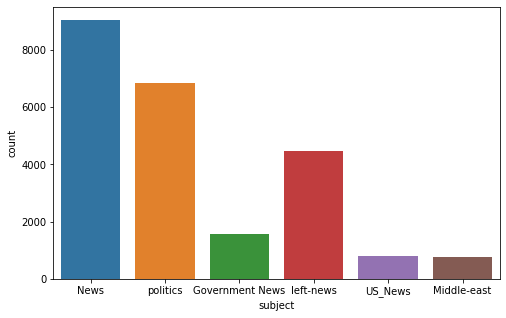

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.show()

In [ ]:
# plt.figure(figsize=(8,5))
# sns.countplot("title", data=fake)
# plt.show()

In [ ]:
# plt.figure(figsize=(8,5))
# sns.countplot("text", data=fake)
# plt.show()





In [ ]:
# plt.figure(figsize=(8,5))
# sns.countplot("text", data=fake)
# plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

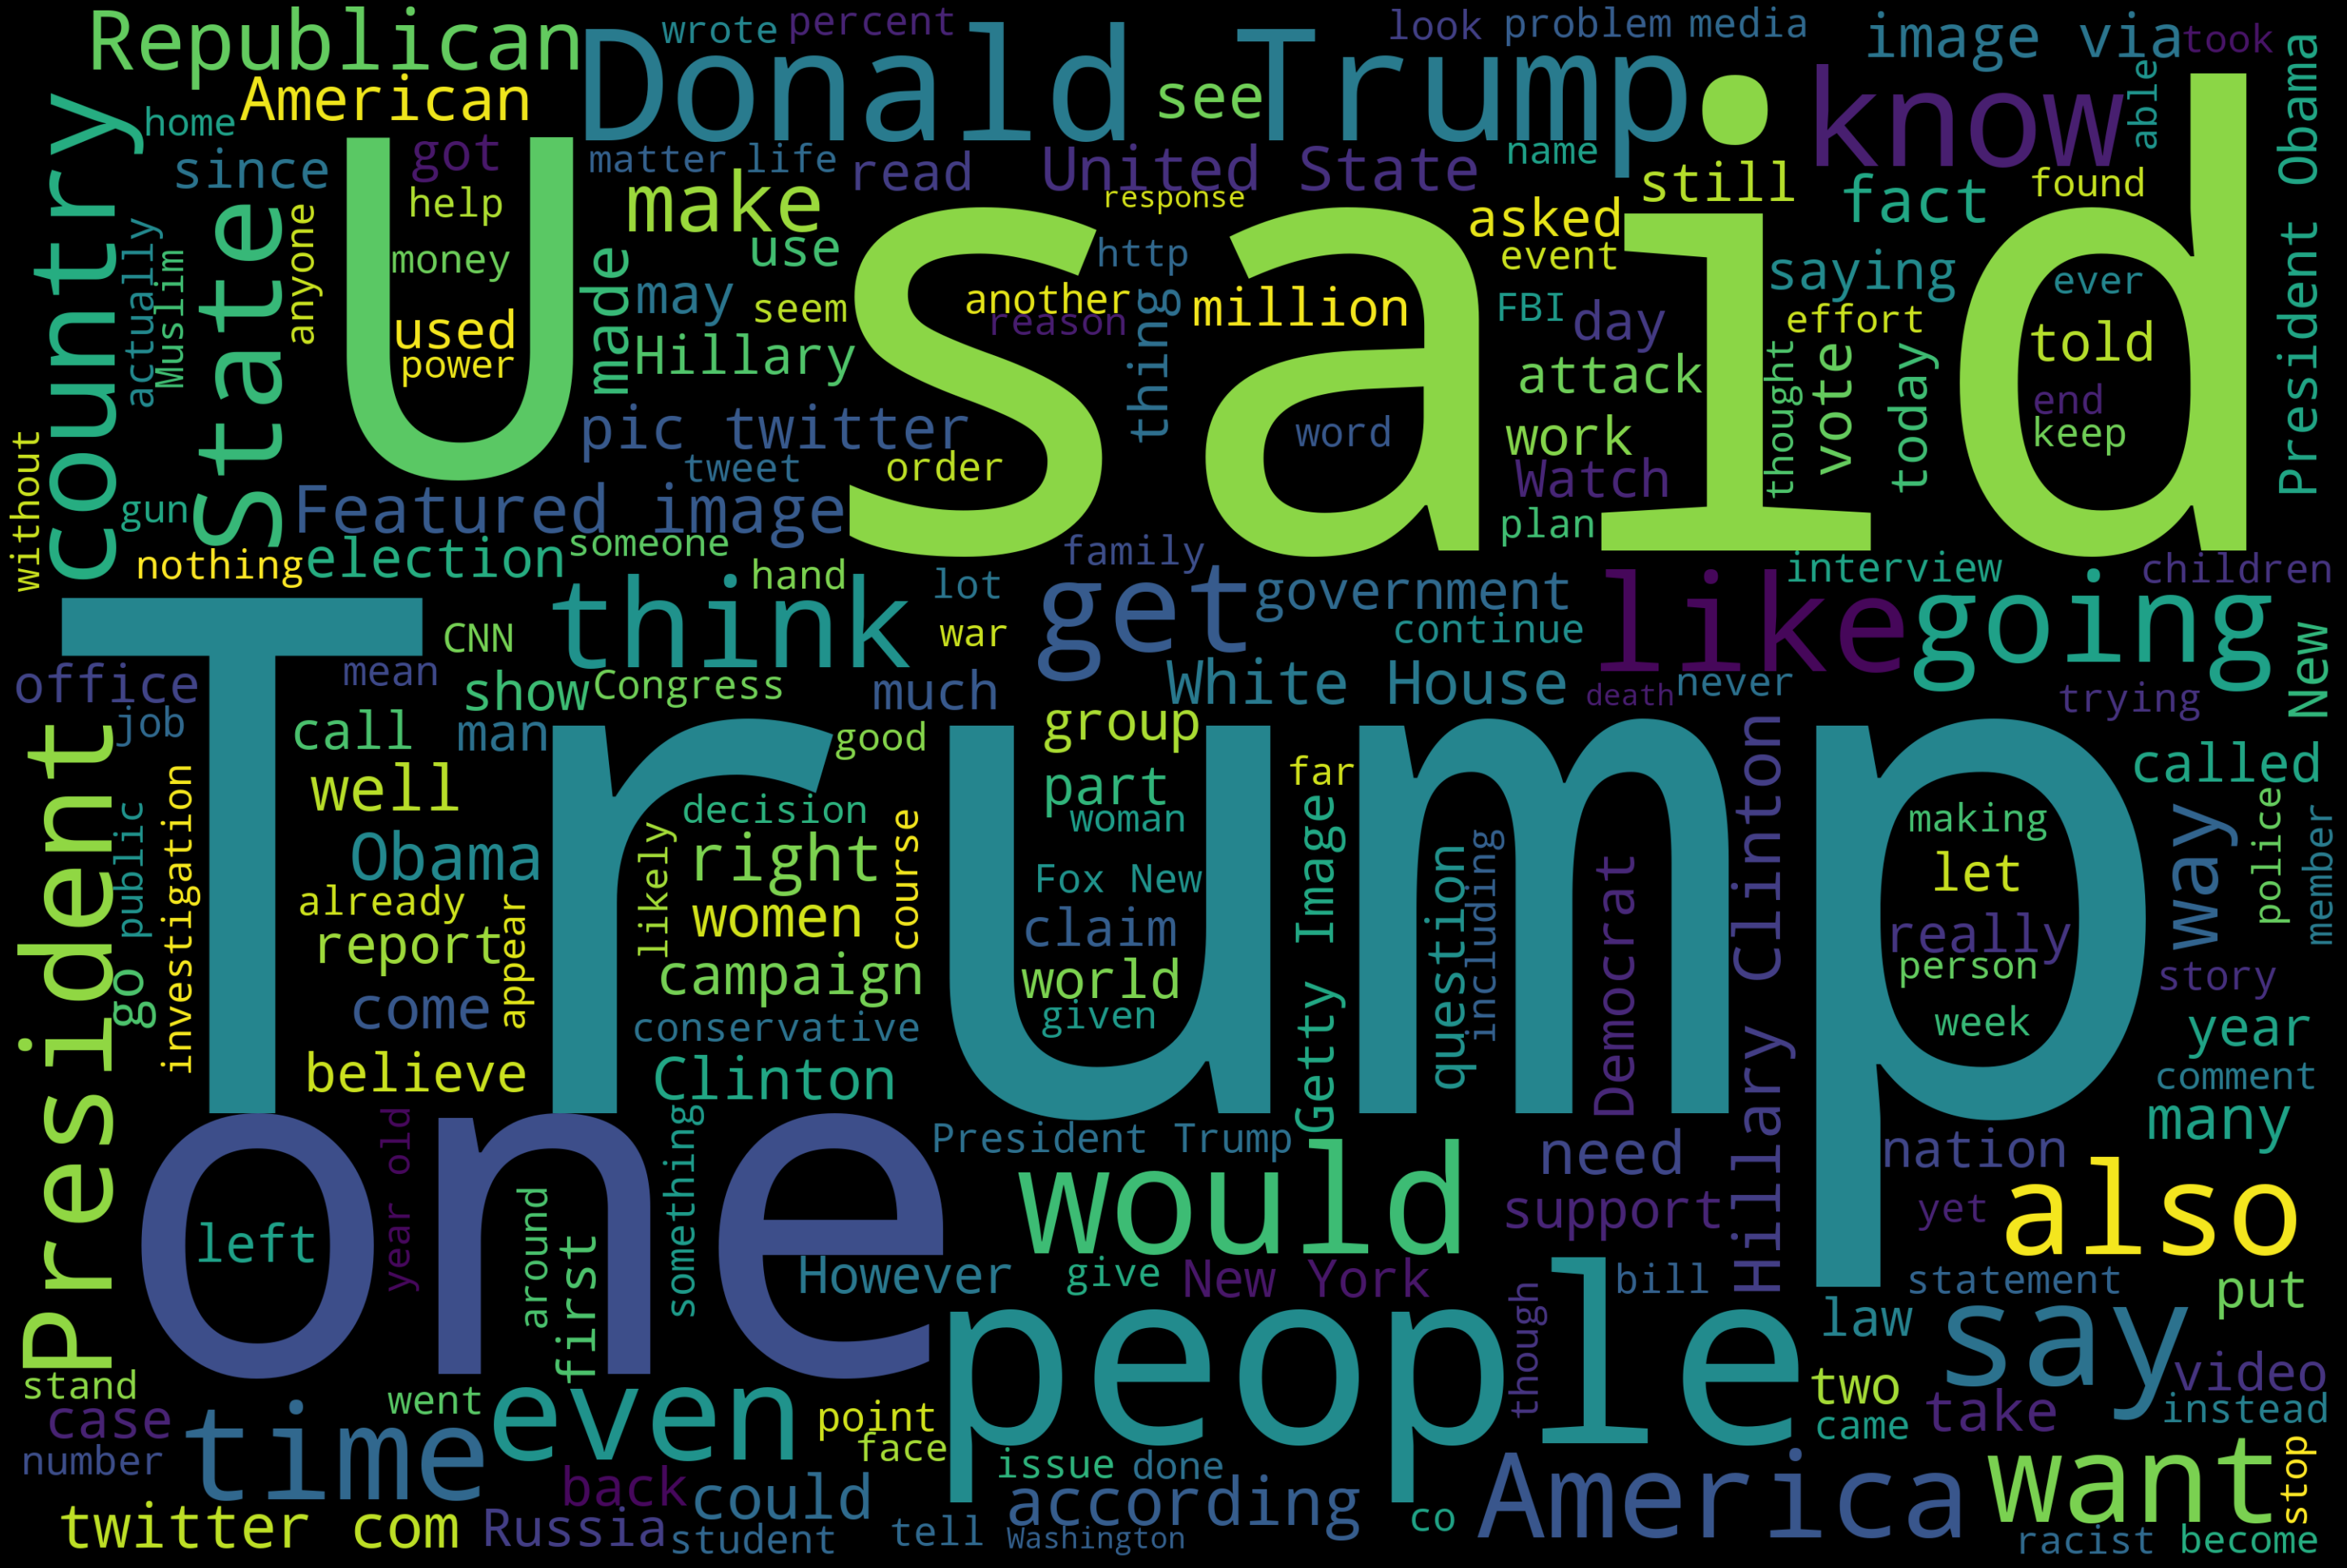

In [ ]:
#Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [ ]:
real = pd.read_csv("/content/drive/MyDrive/news/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:

unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)

        record[1]
       
    except:
        unknown_publishers.append(index)

In [ ]:


real.iloc[unknown_publishers].text


3488    The White House on Wednesday disclosed a group...
4358    Neil Gorsuch, President Donald Trump’s appoint...
4465    WASHINGTON The clock began running out this we...
5784    Federal appeals court judge Neil Gorsuch, the ...
6660    Republican members of Congress are complaining...
6823    Over the course of the U.S. presidential campa...
7922    After going through a week reminiscent of Napo...
8194    The following timeline charts the origin and s...
8195    Global health officials are racing to better u...
8247    U.S. President Barack Obama visited a street m...
8465    ALGONAC, MICH.—Parker Fox drifted out of the D...
8481    Global health officials are racing to better u...
8482    The following timeline charts the origin and s...
8505    Global health officials are racing to better u...
8506    The following timeline charts the origin and s...
8771    In a speech weighted with America’s complicate...
8970                                                     
9008    The fo

In [ ]:
real.iloc[8970]


title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:

publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [ ]:

real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:

[index for index,text in enumerate(real.text.values) if str(text).strip() == '']


[8970]

In [ ]:

real = real.drop(8970, axis=0)

In [ ]:
# fack news
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [ ]:

print(f"Total Records:\t{real.shape[0]}")


for key,count in real.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


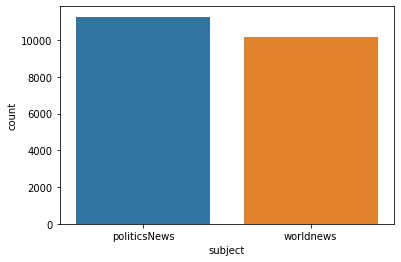

In [ ]:
sns.countplot(x="subject", data=real)
plt.show()

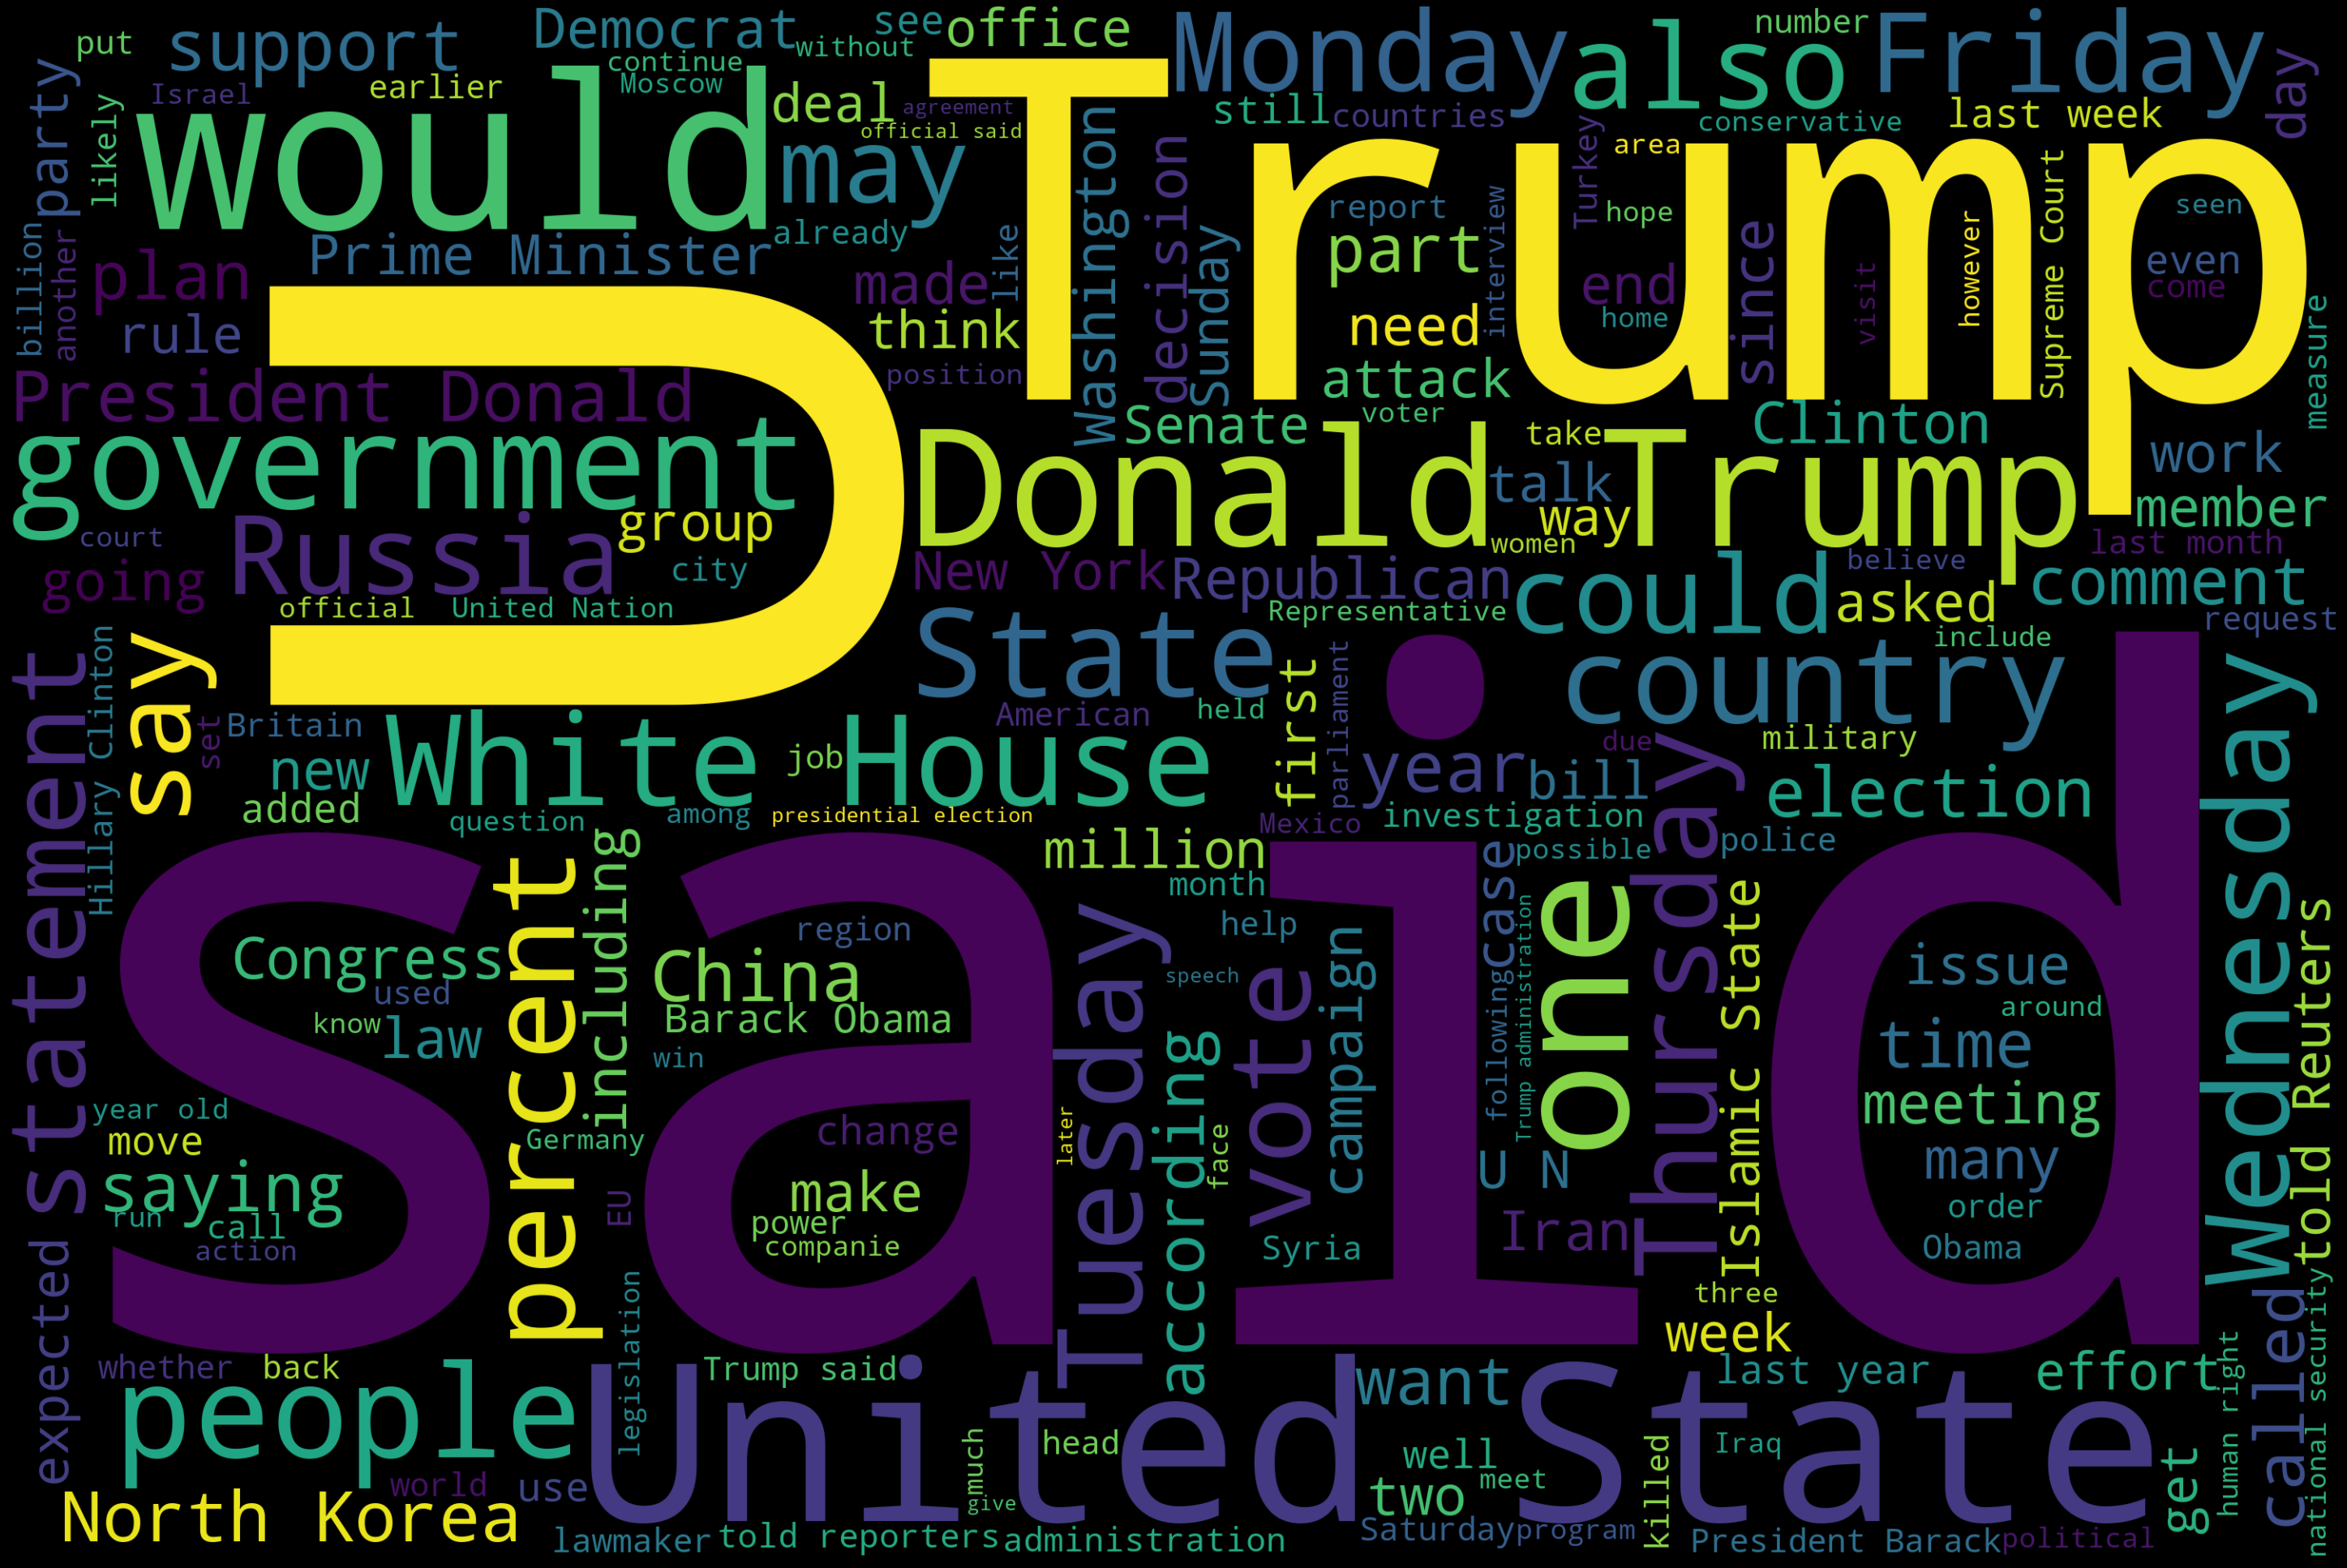

In [ ]:
#WordCloud For Real News
text = ''
for news in real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text


In [ ]:

real["class"] = 1
fake["class"] = 0

In [ ]:
#
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [ ]:

real = real.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [ ]:

data = real.append(fake, ignore_index=True)
del real, fake

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
y = data["class"].values

X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

In [ ]:
import gensim

In [ ]:
EMBEDDING_DIM = 100


w2v_model = gensim.models.Word2Vec(sentences=X,size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:

len(w2v_model.wv.vocab)



122247

In [ ]:
#see a sample vector for random word, lets say Corona 
w2v_model["corona"]

array([ 0.04237369,  0.02695978,  0.0063915 , -0.03487455, -0.02222909,
       -0.10565617, -0.05934244, -0.02974888, -0.03127589,  0.04026093,
       -0.0024168 ,  0.0394428 , -0.03788371, -0.01795548, -0.0195365 ,
        0.06566169, -0.00509512,  0.04033861,  0.0410855 ,  0.00898311,
        0.00058972, -0.02161471, -0.00579034, -0.0036759 ,  0.04466457,
       -0.03920839, -0.00160368, -0.00531454, -0.00771833,  0.01394134,
       -0.03764596, -0.03147808, -0.01749896, -0.02043357, -0.03517723,
        0.00089617, -0.00950268,  0.01279976,  0.03378164,  0.0026333 ,
       -0.0541719 , -0.03825071,  0.08162995,  0.00976223,  0.01750846,
       -0.01962677,  0.02801162,  0.00814336, -0.041761  ,  0.00171611,
        0.02468715,  0.03796987, -0.03029148,  0.00446388,  0.06424751,
       -0.03571731, -0.01034548, -0.0716621 ,  0.07810326,  0.06053077,
        0.00672429,  0.00366823, -0.07950018, -0.00770187, -0.05354655,
        0.05501867, -0.01106629, -0.01013173, -0.00738632,  0.00

In [ ]:
w2v_model.wv.most_similar("pakistan")

[('islamabad', 0.7634268999099731),
 ('india', 0.7094125747680664),
 ('afghanistan', 0.681274950504303),
 ('taliban', 0.6465752124786377),
 ('pakistani', 0.6319496631622314),
 ('afghan', 0.6181381344795227),
 ('egypt', 0.5843677520751953),
 ('islamist', 0.5750963091850281),
 ('militancy', 0.562829852104187),
 ('qatar', 0.5591984391212463)]

In [ ]:
w2v_model.wv.most_similar("lahore")

[('peshawar', 0.7016857862472534),
 ('yaqoob', 0.7007147073745728),
 ('marib', 0.6800368428230286),
 ('kisumu', 0.6679356098175049),
 ('misrata', 0.6611605882644653),
 ('maradi', 0.6592820882797241),
 ('ameeni', 0.6585520505905151),
 ('northwestern', 0.6570653915405273),
 ('khair', 0.6511824131011963),
 ('yorktown', 0.6507889032363892)]

In [ ]:
w2v_model.wv.most_similar("crime")

[('crimes', 0.7492989301681519),
 ('murder', 0.6263453364372253),
 ('criminals', 0.6234239339828491),
 ('offenders', 0.5804387331008911),
 ('2017mention', 0.5721852779388428),
 ('murders', 0.5639206171035767),
 ('committing', 0.5596785545349121),
 ('gangs', 0.5548833608627319),
 ('criminal', 0.5545475482940674),
 ('offenses', 0.5401994585990906)]

In [ ]:
w2v_model.wv.most_similar("america")

[('nation', 0.7178049087524414),
 ('country', 0.6933108568191528),
 ('american', 0.596366286277771),
 ('us', 0.5761786699295044),
 ('world', 0.5410699844360352),
 ('americans', 0.5215973854064941),
 ('alphabets', 0.5083858966827393),
 ('truly', 0.5055190324783325),
 ('planet', 0.5002846717834473),
 ('intelligenti', 0.49181658029556274)]

In [ ]:
w2v_model.wv.most_similar("islamabad")

[('pakistan', 0.7634268999099731),
 ('taliban', 0.6907923221588135),
 ('ankara', 0.6382527351379395),
 ('islamist', 0.5893418788909912),
 ('insurgents', 0.5813512802124023),
 ('militancy', 0.5808714032173157),
 ('riyadh', 0.5701463222503662),
 ('resupplying', 0.5626242160797119),
 ('militants', 0.5621509552001953),
 ('pakistani', 0.5603788495063782)]

In [ ]:
w2v_model.wv.most_similar("corruption")

[('graft', 0.8387562036514282),
 ('cronyism', 0.647960901260376),
 ('bribery', 0.6469725966453552),
 ('corrupt', 0.617721438407898),
 ('rampant', 0.5654929876327515),
 ('scandals', 0.5623064041137695),
 ('mismanagement', 0.5579147338867188),
 ('criminal', 0.5445773005485535),
 ('purge', 0.5421341061592102),
 ('dishonesty', 0.5389630198478699)]

In [ ]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.8877900838851929),
 ('iranian', 0.7590100765228271),
 ('hezbollah', 0.6378693580627441),
 ('iranians', 0.6378428936004639),
 ('destabilizing', 0.6323806643486023),
 ('nuclear', 0.6163288354873657),
 ('riyadh', 0.6142077445983887),
 ('saudis', 0.5999089479446411),
 ('jcpoa', 0.5891659259796143),
 ('qatar', 0.5794782042503357)]

In [ ]:
w2v_model.wv.most_similar("fbi")

[('comey', 0.7362915873527527),
 ('cia', 0.5933502316474915),
 ('mueller', 0.5932821035385132),
 ('investigators', 0.5909762382507324),
 ('investigation', 0.5851638317108154),
 ('doj', 0.5750585794448853),
 ('whosonfirst', 0.5729038715362549),
 ('dhs', 0.5198808908462524),
 ('heuchling', 0.512859046459198),
 ('investigations', 0.5122429728507996)]

In [ ]:
w2v_model.wv.most_similar("facebook")

[('reddit', 0.655866265296936),
 ('instagram', 0.6441843509674072),
 ('gofundme', 0.6201817989349365),
 ('fb', 0.6076763272285461),
 ('4chan', 0.6032449007034302),
 ('google', 0.5866854190826416),
 ('carlyfiorinaforvicepresident', 0.5841798782348633),
 ('online', 0.5825037956237793),
 ('posting', 0.5576556324958801),
 ('website', 0.5523273944854736)]

In [ ]:
w2v_model.wv.most_similar("computer")

[('computers', 0.8526574969291687),
 ('software', 0.7942124605178833),
 ('electronic', 0.7909515500068665),
 ('malware', 0.7558451294898987),
 ('laptop', 0.7430859804153442),
 ('kaspersky', 0.7383679151535034),
 ('scanning', 0.7190812230110168),
 ('smartphones', 0.717002272605896),
 ('servers', 0.7169339656829834),
 ('detection', 0.7152076959609985)]

In [ ]:
w2v_model.wv.most_similar("election")

[('elections', 0.8400492668151855),
 ('primaries', 0.6444315910339355),
 ('electoral', 0.6270847320556641),
 ('nominating', 0.5862009525299072),
 ('contest', 0.5829370021820068),
 ('nomination', 0.5762472152709961),
 ('primary', 0.5550813674926758),
 ('doa', 0.5376660823822021),
 ('presidency', 0.5316870808601379),
 ('reelection', 0.5228161215782166)]

In [ ]:
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])


[('bush', 0.5277602672576904),
 ('americas_dad', 0.51158607006073),
 ('course', 0.5086553692817688),
 ('elect', 0.4962801933288574),
 ('incoming', 0.4957039952278137),
 ('cruz', 0.48201853036880493),
 ('crooked', 0.47404423356056213),
 ('hillary', 0.4721958041191101),
 ('ere', 0.4475443959236145),
 ('clintons', 0.4399383068084717)]

In [ ]:
w2v_model.wv.most_similar(positive=["cricket","football","hockey"])

[('soccer', 0.8257938623428345),
 ('championships', 0.758152961730957),
 ('basketball', 0.7572252750396729),
 ('aflw', 0.7464937567710876),
 ('spangled', 0.7456095814704895),
 ('broadway', 0.7298219203948975),
 ('knelt', 0.7288455367088318),
 ('championship', 0.7217967510223389),
 ('cardinalshalf', 0.7159193754196167),
 ('falcons', 0.7117393612861633)]

In [ ]:
w2v_model.wv.most_similar(positive=["2022"])

[('2021', 0.8530868887901306),
 ('2025', 0.7865639925003052),
 ('expire', 0.7559430599212646),
 ('2023', 0.7271941304206848),
 ('completion', 0.7240355014801025),
 ('2019', 0.7138751745223999),
 ('2024', 0.711225688457489),
 ('expires', 0.6991293430328369),
 ('2018', 0.6814240217208862),
 ('2027', 0.669969916343689)]

In [ ]:
w2v_model.wv.most_similar("india")

[('pakistan', 0.7094125747680664),
 ('philippines', 0.6828857660293579),
 ('malaysia', 0.6729730367660522),
 ('china', 0.6654132604598999),
 ('japan', 0.6598556041717529),
 ('thailand', 0.6247201561927795),
 ('australia', 0.6192899346351624),
 ('indonesia', 0.6073845624923706),
 ('norway', 0.6001317501068115),
 ('beijing', 0.588519275188446)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
X[0][:10]

[389, 395, 10494, 54, 5508, 1286, 4840, 315, 205, 16]

In [ ]:

word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break 

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10


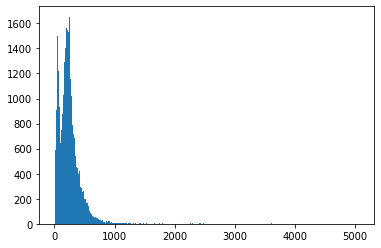

In [ ]:

plt.hist([len(x) for x in X], bins=500)
plt.show()



In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])


43983

In [ ]:
maxlen = 700 

X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[0])

700

In [ ]:

vocab_size = len(tokenizer.word_index) + 1

In [ ]:

def get_weight_matrix(model, vocab):

    vocab_size = len(vocab) + 1

    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [ ]:

model = Sequential()

model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))

model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          12224800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12,342,177
Trainable params: 117,377
Non-trainable params: 12,224,800
_________________________________________________________________


In [ ]:
# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [ ]:
history=model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 862s 1s/step - loss: 0.1228 - acc: 0.9561 - val_loss: 0.1027 - val_acc: 0.9613
Epoch 2/6
737/737 [==============================] - 823s 1s/step - loss: 0.0674 - acc: 0.9767 - val_loss: 0.0440 - val_acc: 0.9835
Epoch 3/6
118/737 [===>..........................] - ETA: 9:56 - loss: 0.0253 - acc: 0.9899

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = list(np.arange(0,6,1))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = list(np.arange(0,6, 1))
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
x=["this is news"]

In [ ]:
X_test

In [ ]:
len(tokenizer.texts_to_matrix(x)[0])

In [ ]:
tokenizer.texts_to_matrix(x)

In [ ]:
# fack news represent by [0]
x=["trump die today"]
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)


In [ ]:
(model.predict(x)>= 0.5).astype(int)

In [ ]:
 model.predict(x)


In [ ]:
# true news news represent by [1]
m=["The International Association of National Public Health Institutes (IANPHI) recognizes NIH Pakistan for its outstanding success in COVID19 emergency response. The certificate of recognition was presented to ED NIH, Maj. Gen. Prof. Aamer Ikram during the IANPHI annual meeting 2022"]
m=tokenizer.texts_to_sequences(m)
m=pad_sequences(m,maxlen=maxlen)


In [ ]:
(model.predict(m)>= 0.5).astype(int)

In [ ]:
 model.predict(m)


In [ ]:
# true news news represent by [1]
l=["Mexico ruling party hopeful attacks rival's 'hunger for power"]
l=tokenizer.texts_to_sequences(l)
l=pad_sequences(l,maxlen=maxlen)

In [ ]:
(model.predict(l)>= 0.5).astype(int)

In [ ]:
# true news news represent by [1]
b=["Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus."]
b=tokenizer.texts_to_sequences(b)
b=pad_sequences(b,maxlen=maxlen)

In [ ]:
(model.predict(b)>= 0.5).astype(int)

In [ ]:
# true news news represent by [1]
c=["England win cricket world cup 2022"]
c=tokenizer.texts_to_sequences(c)
c=pad_sequences(c,maxlen=maxlen)

In [ ]:
(model.predict(c)>= 0.5).astype(int)